In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
# from matplotlib.image import imread
import matplotlib.image as mpimg

In [ ]:
# /home/gpaudel/Pictures/nature.jpg

In [7]:
A = mpimg.imread('/home/gpaudel/Pictures/nature.jpg')

In [9]:
print(A)

[[[110 114 159]
  [104 106 155]
  [ 88  82 142]
  ...
  [  1 113 197]
  [  1 113 195]
  [  2 114 196]]

 [[ 88  92 139]
  [ 91  93 144]
  [ 88  82 144]
  ...
  [  1 113 197]
  [  1 113 195]
  [  2 114 196]]

 [[ 28  30  81]
  [ 41  40  97]
  [ 54  49 113]
  ...
  [  1 113 195]
  [  1 113 195]
  [  2 114 196]]

 ...

 [[144 122 160]
  [136 114 150]
  [140 120 148]
  ...
  [  0 113 206]
  [  0 113 206]
  [  0 113 206]]

 [[122  95 128]
  [107  81 110]
  [107  79 102]
  ...
  [  0 111 205]
  [  0 111 205]
  [  0 111 205]]

 [[131 102 132]
  [113  85 110]
  [112  80 101]
  ...
  [  0 111 205]
  [  0 111 205]
  [  0 111 205]]]


In [10]:
A.shape

(2400, 3840, 3)

In [21]:
print(A.size)

27648000


In [12]:
#convert to grayscale 
X = np.mean(A, -1)

In [14]:
X.shape

(2400, 3840)

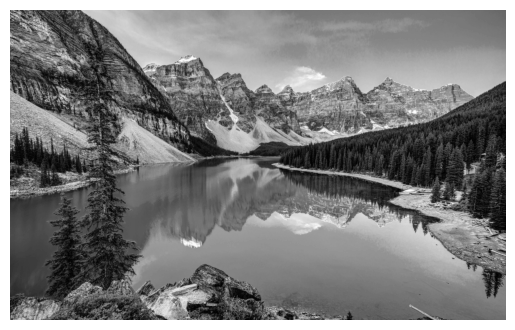

In [17]:
image = plt.imshow(X)
image.set_cmap('gray')
plt.axis('off')
plt.show()

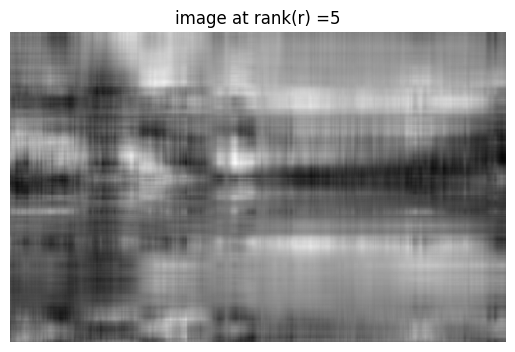

image size at rank 5 is: 9216000


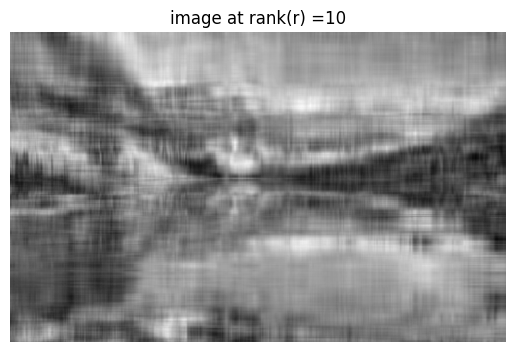

image size at rank 10 is: 9216000


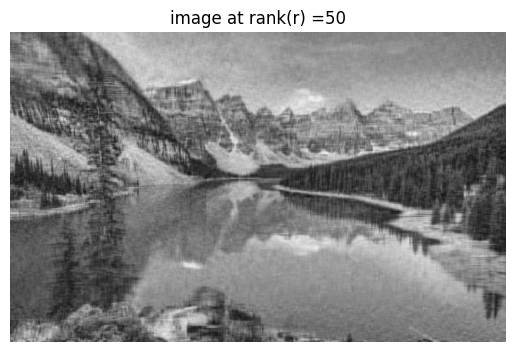

image size at rank 50 is: 9216000


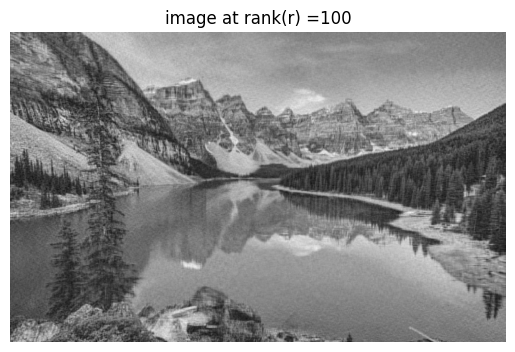

image size at rank 100 is: 9216000


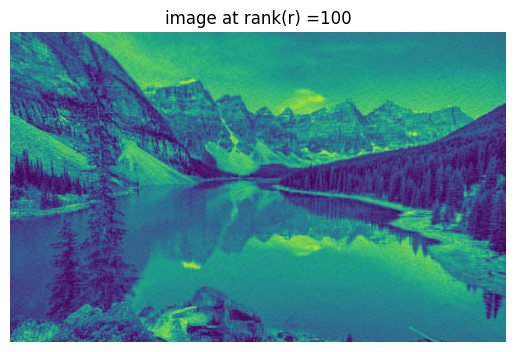

In [30]:
U,S,VT = np.linalg.svd(X, full_matrices=False)
S = np.diag(S)

ranks = [5, 10, 50, 100]
i = 0
for r in ranks:
    X_a = np.dot(U[:, :r] ,S[0:r,:r])
    X_approx = np.dot(X_a, VT[:r,:])
    plt.figure(i+1)
    i = i+1
    image = plt.imshow(X_approx)
    image.set_cmap('gray')
    plt.axis('off')
    plt.title('image at rank(r) =' + str(r))
    plt.show()
    print("image size at rank", r, "is:", X_approx.size)

    if(r == 100):
        normalized_image = X_approx / np.max(X_approx)
        color_image = plt.cm.viridis(normalized_image)

        image = plt.imshow(color_image)
        plt.axis('off')
        plt.title('image at rank(r) =' + str(r))
        plt.show()



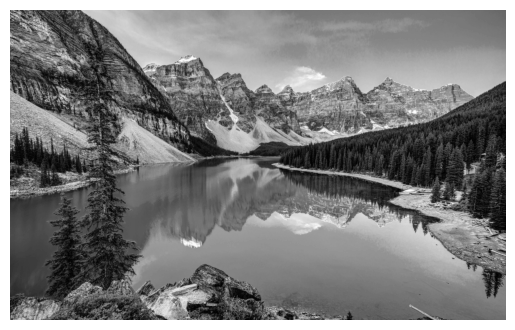

In [20]:
image = plt.imshow(X)
image.set_cmap('gray')
plt.axis('off')
plt.show()

In [42]:
print(A.size)

27648000


/tmp/ipykernel_4327/3178523461.py:53: ComplexWarning: Casting complex values to real discards the imaginary part
  return compressed_image.astype(np.float64)


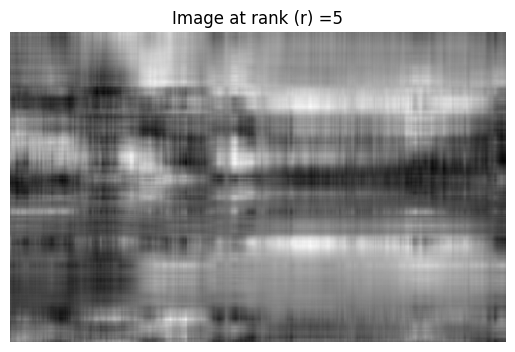

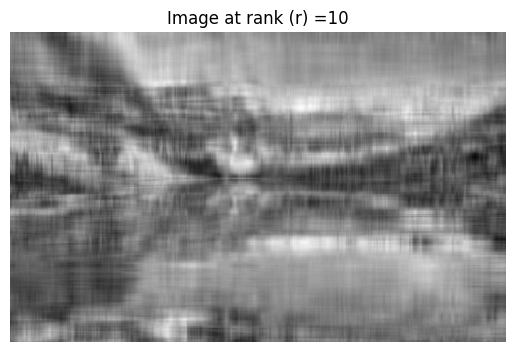

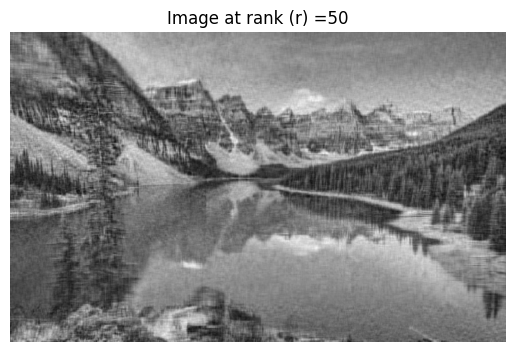

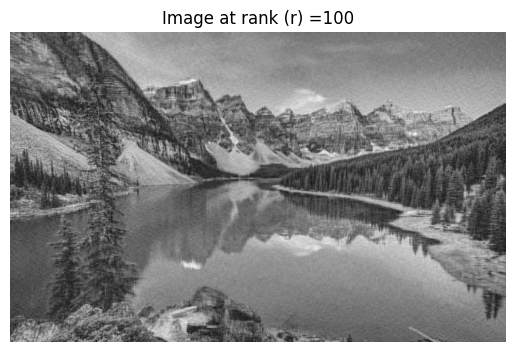

image size at rank 100 is: 9216000


In [3]:
class image_compression:

    def __init__(self, image):

        self.image = image
        self.rgb_image = None
        self.gray_image = None
        self.U = None
        self.sigma = None
        self.V = None
    
    def load_image(self):

        self.rgb_image = plt.imread(self.image)
    
    def cvt_to_grayscale(self):

        self.gray_image = np.dot(self.rgb_image[...,:3], [0.2989, 0.5870, 0.1140])
    
    def svd(self):

        A = self.gray_image
        
        covariance_mat = A.T @ A
        
        eigenvalues, eigenvectors = np.linalg.eig(covariance_mat)
        
        sort_index_desc = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sort_index_desc]
        eigenvectors = eigenvectors[:, sort_index_desc]
        
        sigma = np.sqrt(eigenvalues)
        sigma_value = 1 / sigma
        sigma_matrix = np.diag(sigma_value)
        
        U = A @ eigenvectors @ sigma_matrix
        V = eigenvectors
        
        self.U = U
        self.sigma = sigma
        self.V = V
    
    def compress_image(self, rank):

        U = self.U[:, :rank]
        sigma = np.diag(self.sigma[:rank])
        V = self.V[:, :rank] 
        
        compressed_image = U @ sigma @ V.T 
        return compressed_image.astype(np.float64)
    
    def display(self, ranks):
        
        for r in ranks:

            compressed_image = self.compress_image(r)
            
            plt.figure()
            plt.imshow(compressed_image, cmap='gray')
            plt.axis('off')
            plt.title('Image at rank (r) =' + str(r))
            plt.show()
            
        print("image size at rank", r, "is:", compressed_image.size)

            
            

image = '/home/gpaudel/Pictures/nature.jpg'
ranks = [5, 10, 50,100]

result = image_compression(image)
result.load_image()
result.cvt_to_grayscale()
result.svd()
result.display(ranks)
